<a href="https://colab.research.google.com/github/Janahmedtawfik/Janahmedtawfik/blob/deep-learning/ministdeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
minist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = minist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape #28X28

(60000, 28, 28)

In [5]:
y_test.shape

(10000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

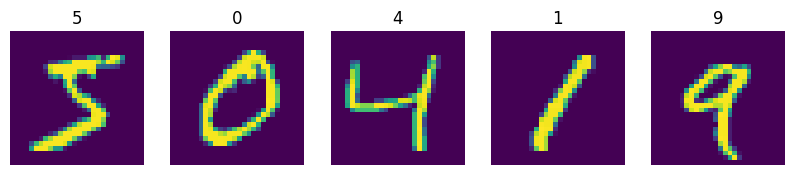

In [8]:
fig = plt.figure(figsize=(10, 2))
axes = fig.subplots(1, 5)

for i in range(5):
  axes[i].imshow(x_train[i])
  axes[i].set_title(y_train[i])
  axes[i].axis('off')
plt.show()

In [9]:
x_train, x_test = x_train/255.0, x_test/255.0 #normalize 255 3shan heya img

In [10]:
model = keras.Sequential([
    #First convolutional layer
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), # 32 filters 3x3
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    #Second convolutional layer
    keras.layers.Conv2D(64, (3,3), activation='relu'), #el layer el fel awl btakhod hagat baseeta el layer el tanya btakhod el kbeer
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    #flatten layer
    keras.layers.Flatten(),
    #fully connected layer
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2), # drop 0.2 men el data random neurons
    #output layer
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

train el model

In [13]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_data =(x_test, y_test),
          callbacks = [early_stopping])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9286 - loss: 0.2408 - val_accuracy: 0.9820 - val_loss: 0.0572
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9828 - loss: 0.0577 - val_accuracy: 0.9832 - val_loss: 0.0615
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9877 - loss: 0.0419 - val_accuracy: 0.9893 - val_loss: 0.0392
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9904 - loss: 0.0334 - val_accuracy: 0.9878 - val_loss: 0.0407
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9906 - loss: 0.0289 - val_accuracy: 0.9842 - val_loss: 0.0542
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9922 - loss: 0.0249 - val_accuracy: 0.9903 - val_loss: 0.0377
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9931 - loss: 0.0231 - val_accuracy: 0.9909 - val_loss: 0.0342
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9951 - loss: 0.017

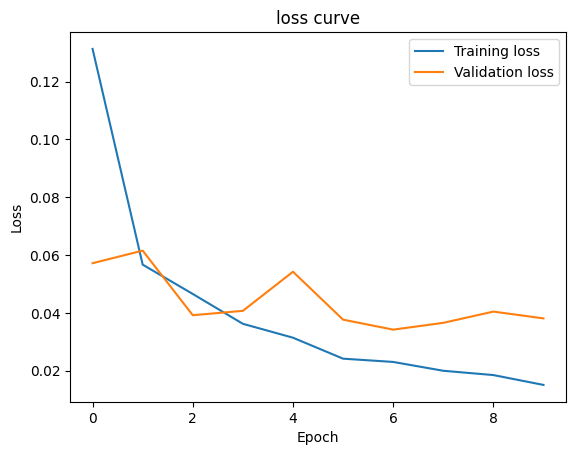

In [14]:
plt.plot(history.history['loss'], label= 'Training loss')
plt.plot(history.history['val_loss'], label= 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('loss curve')
plt.legend() # el box el by2oli el lon dah bt3 kaza w dah bt3 kaza
plt.show()

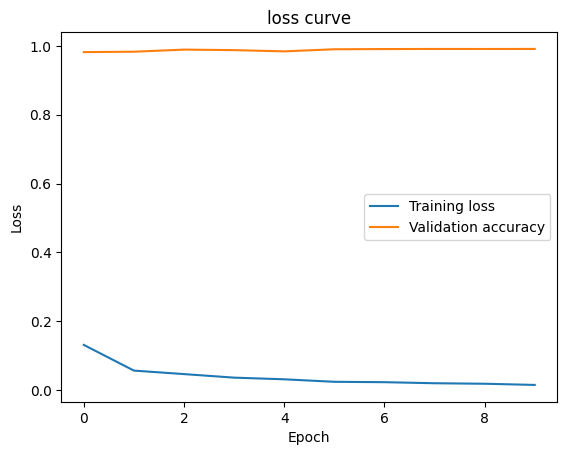

In [15]:
plt.plot(history.history['loss'], label= 'Training loss')
plt.plot(history.history['val_accuracy'], label= 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('loss curve')
plt.legend()
plt.show()

In [16]:
prediction = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
def show_prediction(index):
  plt.imshow(x_test[index].reshape(28,28))
  predicted_label = np.argmax(prediction[index])
  true_label = y_test[index]
  plt.title(f"Predicted: {predicted_label}, True: {true_label}")
  plt.axis('off')
  plt.show()

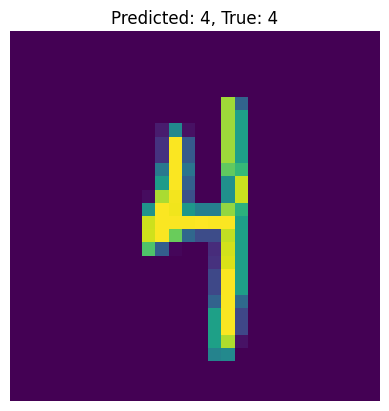

In [18]:
show_prediction(65)

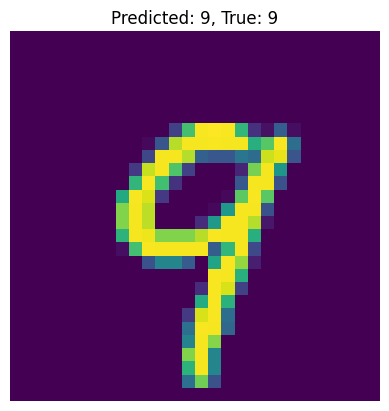

In [19]:
show_prediction(12)